Load News Data

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from textblob import TextBlob
import os

# Load news data
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Drop unnamed index column if exists
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Function to remove timezone info from datetime objects
def remove_timezone(x):
    if isinstance(x, pd.Timestamp) and x.tzinfo is not None:
        return x.tz_convert(None)
    elif isinstance(x, datetime) and x.tzinfo is not None:
        return x.replace(tzinfo=None)
    return x

# Parse and clean date column
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['date'] = df['date'].apply(remove_timezone)

news_df = df.copy()

print(news_df.head(3).to_string())
print("Columns:", news_df.columns.tolist())

C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_26532\1244686598.py:23: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')


                                     headline                                                                                      url          publisher                date stock
0     Stocks That Hit 52-Week Highs On Friday     https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday  Benzinga Insights 2020-06-05 10:30:54     A
1  Stocks That Hit 52-Week Highs On Wednesday  https://www.benzinga.com/news/20/06/16170189/stocks-that-hit-52-week-highs-on-wednesday  Benzinga Insights 2020-06-03 10:45:20     A
2               71 Biggest Movers From Friday               https://www.benzinga.com/news/20/05/16103463/71-biggest-movers-from-friday         Lisa Levin 2020-05-26 04:30:07     A
Columns: ['headline', 'url', 'publisher', 'date', 'stock']


Date Alignment, normalize

In [79]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df.dropna(subset=['date'], inplace=True)
news_df.set_index('date', inplace=True)
news_df.index = news_df.index.normalize()

# confirm the index
print("Index Info:", news_df.index)
print(news_df.head(3).to_string())

Index Info: DatetimeIndex(['2020-06-05', '2020-06-03', '2020-05-26', '2020-05-22',
               '2020-05-22', '2020-05-22', '2020-05-22', '2020-05-22',
               '2020-05-22', '2020-05-22',
               ...
               '2012-08-22', '2012-07-30', '2011-12-30', '2011-11-28',
               '2011-11-21', '2011-08-29', '2011-06-22', '2011-06-21',
               '2011-06-21', '2011-05-12'],
              dtype='datetime64[ns]', name='date', length=1407328, freq=None)
                                              headline                                                                                      url          publisher stock
date                                                                                                                                                                    
2020-06-05     Stocks That Hit 52-Week Highs On Friday     https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday  Benzinga Insights     A
2020-06-03  S

Descriptive Stats: Headline Length

Text(0.5, 1.0, 'Distribution of Headline Lengths')

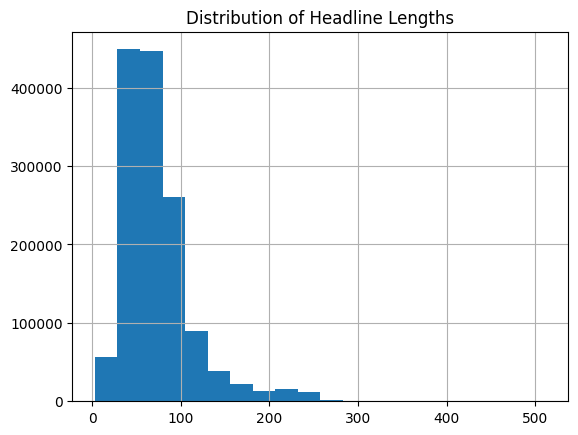

In [80]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()
df['headline_length'].hist(bins=20)
plt.title("Distribution of Headline Lengths")

Articles per Publisher

(array([   0,    1,    2, ..., 1031, 1032, 1033], shape=(1034,)),
 [Text(0, 0, 'Paul Quintaro'),
  Text(1, 0, 'Lisa Levin'),
  Text(2, 0, 'Benzinga Newsdesk'),
  Text(3, 0, 'Charles Gross'),
  Text(4, 0, 'Monica Gerson'),
  Text(5, 0, 'Eddie Staley'),
  Text(6, 0, 'Hal Lindon'),
  Text(7, 0, 'ETF Professor'),
  Text(8, 0, 'Juan Lopez'),
  Text(9, 0, 'Benzinga Staff'),
  Text(10, 0, 'Vick Meyer'),
  Text(11, 0, 'webmaster'),
  Text(12, 0, 'Benzinga_Newsdesk'),
  Text(13, 0, 'Zacks'),
  Text(14, 0, 'Jayson Derrick'),
  Text(15, 0, 'Allie Wickman'),
  Text(16, 0, 'Shanthi Rexaline'),
  Text(17, 0, 'Craig Jones'),
  Text(18, 0, 'Wayne Duggan'),
  Text(19, 0, 'Nelson Hem'),
  Text(20, 0, 'Dwight Einhorn'),
  Text(21, 0, 'Michael J. Zerinskas'),
  Text(22, 0, 'Joe Young'),
  Text(23, 0, 'Javier Hasse'),
  Text(24, 0, 'David Johnson'),
  Text(25, 0, 'Matthew Kennedy'),
  Text(26, 0, 'Forex Live'),
  Text(27, 0, 'Laura Brodbeck'),
  Text(28, 0, 'Scott Rubin'),
  Text(29, 0, "Jake L'Ecuyer"),
 

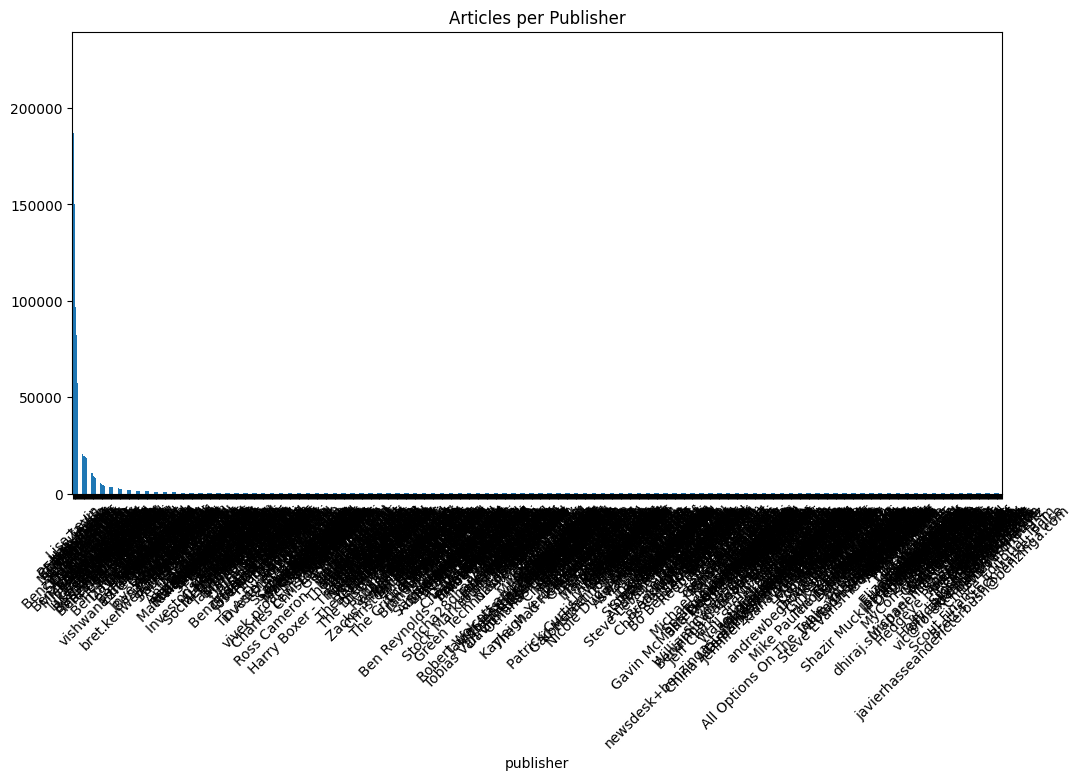

In [81]:
df['publisher'].value_counts().plot(kind='bar', figsize=(12, 6), title='Articles per Publisher')
plt.xticks(rotation=45)

Time Series Analysis: Publication Frequency

Text(0, 0.5, 'Article Count')

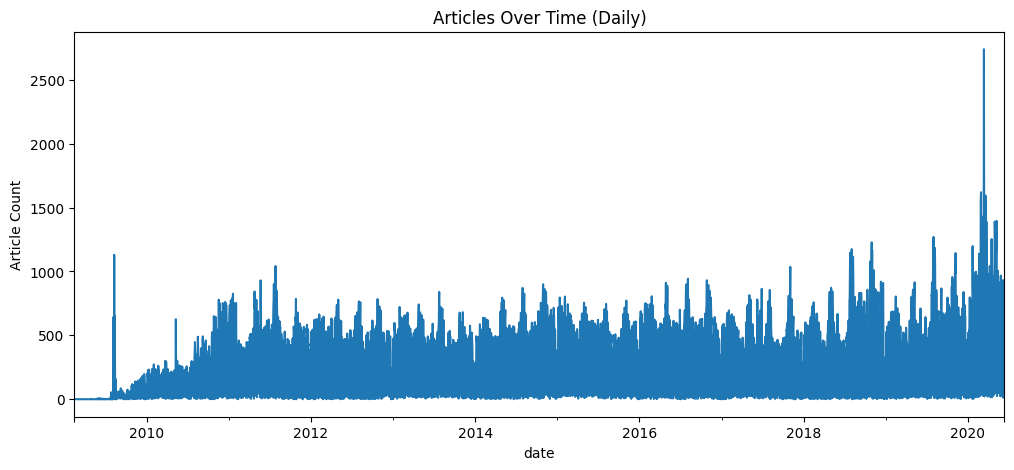

In [82]:
news_df.resample('D').size().plot(figsize=(12, 5), title='Articles Over Time (Daily)')
plt.ylabel('Article Count')

Time Trends of publish by hour

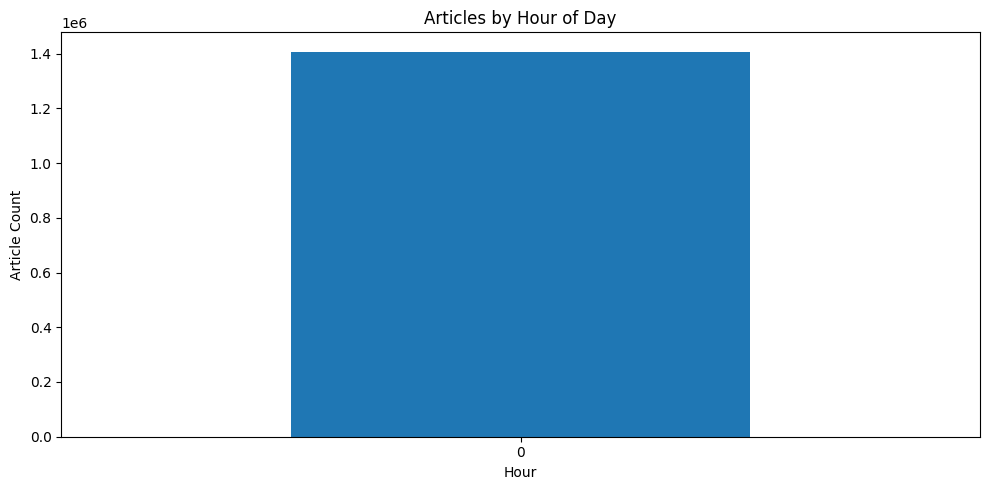

In [83]:
news_df['hour'] = news_df.index.hour
news_df.groupby('hour').size().plot(kind='bar', title='Articles by Hour of Day', figsize=(10, 5))
plt.xlabel('Hour')
plt.ylabel('Article Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Data visualization with Word Cloud for Headlines (Keywords)

[nltk_data] Downloading package stopwords to C:\Users\Tinsae
[nltk_data]     D.D\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

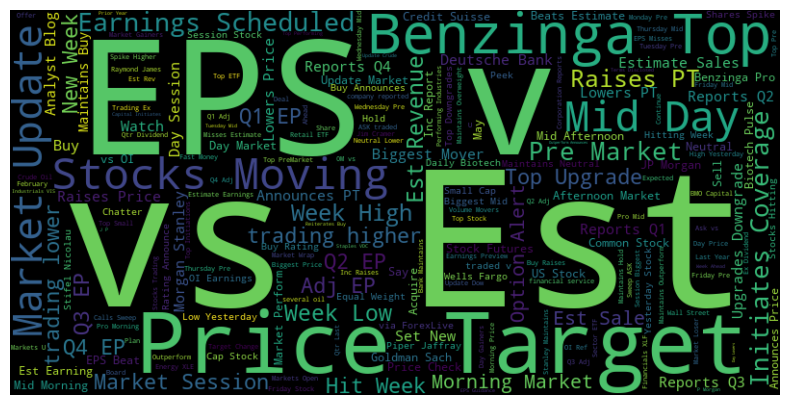

In [84]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

nltk.download('stopwords')
text = ' '.join(df['headline'].dropna())

wordcloud = WordCloud(stopwords=set(stopwords.words('english')), width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Publisher Analysis: Top Publishers & Domain Extraction

In [85]:
# Top 10 publishers by article count
top_publishers = df['publisher'].value_counts().head(10)
print("Top 10 Publishers:\n", top_publishers)

df['publisher_domain'] = df['publisher'].apply(
    lambda x: x.split('@')[1] if isinstance(x, str) and '@' in x else None
)

# Top domains
top_domains = df['publisher_domain'].value_counts().head(10)
print("Top 10 Publisher Domains:\n", top_domains)

Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
Top 10 Publisher Domains:
 publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


Sentiment Scoring

In [86]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df["sentiment"] = news_df["headline"].apply(get_sentiment)
print(news_df[['headline', 'sentiment']].head(2))
print(news_df['sentiment'].isnull().sum())
print(news_df['sentiment'].describe())

                                              headline  sentiment
date                                                             
2020-06-05     Stocks That Hit 52-Week Highs On Friday        0.0
2020-06-03  Stocks That Hit 52-Week Highs On Wednesday        0.0
0
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


Daily Sentiment Aggregation:

In [88]:
# To be used later in technical notebook
daily_sentiment = news_df.groupby(news_df.index).agg({"sentiment": "mean"})
daily_sentiment.rename(columns={"sentiment": "avg_sentiment"}, inplace=True)

print(daily_sentiment.head())

#  Save to CSV to load from technical_analysis later
os.makedirs("../data/processed", exist_ok=True)
daily_sentiment.to_csv("../data/processed/daily_sentiment.csv", index_label="date")

print(news_df.columns)  # Should include 'sentiment'
print(news_df[['headline', 'sentiment']].head())


            avg_sentiment
date                     
2009-02-14       0.000000
2009-04-27       0.000000
2009-04-29       0.000000
2009-05-22       0.000000
2009-05-27       0.234091
Index(['headline', 'url', 'publisher', 'stock', 'hour', 'sentiment'], dtype='object')
                                                     headline  sentiment
date                                                                    
2020-06-05            Stocks That Hit 52-Week Highs On Friday        0.0
2020-06-03         Stocks That Hit 52-Week Highs On Wednesday        0.0
2020-05-26                      71 Biggest Movers From Friday        0.0
2020-05-22       46 Stocks Moving In Friday's Mid-Day Session        0.0
2020-05-22  B of A Securities Maintains Neutral on Agilent...        0.0
